In [1]:
using FastaIO
using Glob
using JuMP
using Clp
using Images, Colors

In [16]:
#Ojo cambio de vertices
n = 256
A = (0,0)
C = (0,n)
G = (n,n)
T = (n,0)

x_0 = (n/2,n/2)

sigCuadro(x_0,nuc) = (ceil((x_0[1]+nuc[1])/2),ceil((x_0[2]+nuc[2])/2))

function sigLetra(x_0,nt)
    if nt == 'A'
        x = A
    elseif nt == 'C'
        x = C
    elseif nt == 'G'
        x = G
    elseif nt == 'T'
        x = T
    else
        x = x_0
    end
    
    return sigCuadro(x_0,x)
end    

sigLetra (generic function with 1 method)

In [17]:
#Dado un archivo de texto en formato fasta
#regresa toda la secuencia de nucleótidos en un string
function creaSeq(archivo)
    secuencia = ""
    for (name, seq) in FastaReader(archivo)
        secuencia = secuencia*seq
    end
    
    return secuencia
end 

#Regresa Matriz de nxn que representa 
#la imagen fractal en escala de grises

function creaMatriz(secuencia)
    jump = 1/length(secuencia)
    fractal_mat = zeros(n,n)
    x_0 = (n/2,n/2)
    
    for i in secuencia
        x_0 = sigLetra(x_0,i)
        x = Int(x_0[1])
        y = Int(x_0[2])
        fractal_mat[x,y] += jump
    end
    
    return fractal_mat
end

#Toma un archivo fasta y regresa matriz que
#representa al fractal
function archivoMatriz(archivo)
    sec = creaSeq(archivo)
    mat = creaMatriz(sec)
    return mat
end

archivoMatriz (generic function with 1 method)

In [11]:
nombres = glob("*.fsa_nt")
matrices = map(archivoMatriz,nombres)
println(length(matrices))

9


In [12]:
m = Model(solver = ClpSolver())

@variable(m, x[1:n,1:n] >= 0)

@constraint(m,const1[i=1:n-1,j=1:n], x[i,j]-x[i+1,j] <= 1)
@constraint(m,const2[i=2:n,j=1:n], x[i,j]-x[i-1,j] <= 1)
@constraint(m,const3[i=1:n,j=1:n-1], x[i,j]-x[i,j+1] <= 1)
@constraint(m,const4[i=1:n,j=2:n], x[i,j]-x[i,j-1] <= 1)

JuMP.JuMPArray{JuMP.ConstraintRef,2,Tuple{UnitRange{Int64},UnitRange{Int64}}}(JuMP.ConstraintRef[x[1,2] - x[1,1] ≤ 1 x[1,3] - x[1,2] ≤ 1 … x[1,255] - x[1,254] ≤ 1 x[1,256] - x[1,255] ≤ 1; x[2,2] - x[2,1] ≤ 1 x[2,3] - x[2,2] ≤ 1 … x[2,255] - x[2,254] ≤ 1 x[2,256] - x[2,255] ≤ 1; … ; x[255,2] - x[255,1] ≤ 1 x[255,3] - x[255,2] ≤ 1 … x[255,255] - x[255,254] ≤ 1 x[255,256] - x[255,255] ≤ 1; x[256,2] - x[256,1] ≤ 1 x[256,3] - x[256,2] ≤ 1 … x[256,255] - x[256,254] ≤ 1 x[256,256] - x[256,255] ≤ 1], (1:256, 2:256), (Dict{Int64,Int64}(), Dict{Int64,Int64}()), Dict{Symbol,Any}())

In [13]:
function optimiza(C)
    if sum(C) < 0
        C *= -1
    end
    @objective(m, Max, sum(C[i,j]*x[i,j] for i=1:n for j=1:n))
    status = solve(m)
    res = getobjectivevalue(m)
    return res              
end

optimiza (generic function with 1 method)

In [14]:
function renglon(i,matrices)
    test = map(x -> matrices[i]-x,matrices)
    resultados = map(optimiza,test[i+1:length(matrices)])
    return vcat(zeros(i),resultados)
end

renglon (generic function with 1 method)

In [ ]:
for i in 1:8
    println(renglon(i,matrices))
end

In [17]:
print(nombres)

String["abyssalis_10389.fsa_nt", "abyssalis_10390.fsa_nt", "nanshensis_01066.fsa_nt", "nanshensis_10372.fsa_nt", "nanshensis_10374.fsa_nt", "nanshensis_10399.fsa_nt", "nanshensis_10429.fsa_nt", "oceani_02100.fsa_nt", "qinglanesis_M10379.fsa_nt"]

In [122]:
function creaDibujo(secuencia)
    jump = 1/4379
    fractal_mat = ones(n,n)
    x_0 = (n/2,n/2)
    
    for i in secuencia
        x_0 = sigLetra(x_0,i)
        x = Int(x_0[1])
        y = Int(x_0[2])
        fractal_mat[x,y] -= jump
    end
    
    temp = reshape(fractal_mat,n*n)
    norm = maximum(temp)
    print(norm)
    
   
    
    return fractal_mat
end

creaDibujo (generic function with 1 method)

In [123]:
pppp = creaDibujo(creaSeq("nanshensis_01066.fsa_nt"))

1.0

256×256 Array{Float64,2}:
 0.999772  0.999315  0.998858  0.999315  …  0.979219  0.998401  0.996118
 1.0       0.999087  0.999772  1.0          0.986527  0.996575  0.997488
 1.0       1.0       0.999315  0.999315     0.978534  0.985156  0.95113 
 1.0       0.999543  0.998858  0.999315     0.980361  0.982873  0.975794
 0.999772  1.0       0.999772  1.0          0.949075  0.943138  0.839461
 1.0       0.999772  1.0       1.0       …  0.964375  0.930806  0.902489
 1.0       0.999772  1.0       0.999543     0.954099  0.965061  0.884449
 1.0       1.0       0.999543  0.999772     0.958895  0.971226  0.963005
 1.0       0.999772  1.0       0.999543     0.925325  0.903631  0.844028
 1.0       0.999772  0.999772  0.999772     0.905686  0.903403  0.761133
 0.999772  1.0       0.999772  0.999772  …  0.901347  0.92464   0.855675
 1.0       1.0       1.0       0.999543     0.929208  0.923042  0.862982
 1.0       1.0       1.0       0.999772     0.940169  0.901119  0.812971
 ⋮                       

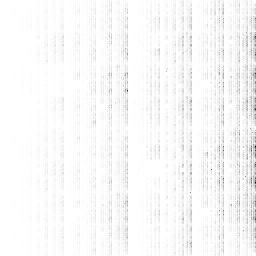

In [124]:
Gray.(pppp)

In [118]:
#Parte aleaoria para verificar hipótesis de IFS con probabilidades
simulans =  creaSeq("nanshensis_01066.fsa_nt")
length(simulans)

7429612

In [45]:
#Cuenta el numero de cada nucleotido 
function cuentaNuc(seq)
    A = 0
    C = 0
    G = 0
    T = 0
    for i in seq
        if i == 'A'
            A += 1
        elseif i == 'C'
            C += 1
        elseif i == 'G'
            G += 1
        elseif i == 'T'
            T += 1
        end
    end
    println(A/3545250)
    println(C/3545250)
    println(G/3545250)
    println(T/3545250)
end

cuentaNuc (generic function with 1 method)

In [125]:
cuentaNuc(simulans)

0.30471504125237997
0.7379902686693464
0.7362400394894577
0.30475904379098795


In [131]:
function dibujoRand(a,c,g,t,l)
    i = 1
    jump = 1
    mat = zeros(n,n)
    x_0 = (n/2,n/2)
    while i <= l
        r = rand()
        if (0 <= r) & (r <= a)
            x_0 = sigLetra(x_0,'A')
        elseif (a < r) & (r <= a+c)
            x_0 = sigLetra(x_0,'C')
        elseif (a+c < r) & (r <= a+c+g)
            x_0 = sigLetra(x_0,'G')
        elseif (a+c+g) < r
            x_0 = sigLetra(x_0,'T')
        end
        x = Int(x_0[1])
        y = Int(x_0[2])
        mat[x,y] += jump
        i += 1
    end
    
    temp = reshape(mat,n*n)
    norm = maximum(temp)
    print(norm)
    
    return mat
end

dibujoRand (generic function with 1 method)

In [132]:
lol = dibujoRand(0.3047,0.7379,0.7362,0.3047,7429612)

402226.0

256×256 Array{Float64,2}:
 537.0  1306.0  1317.0  2887.0  1288.0  …  177690.0  177030.0  402226.0
   0.0     0.0     0.0     0.0     0.0          0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0          0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0          0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0          0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0  …       0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0          0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0          0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0          0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0          0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0  …       0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0          0.0       0.0       0.0
   0.0     0.0     0.0     0.0     0.0          0.0       0.0       0.0
   ⋮                                  

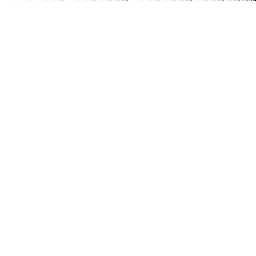

In [130]:
Gray.(lol)